<a href="https://colab.research.google.com/github/gpriya32/NLP/blob/master/SPAM_MAILS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lets begin()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv('/content/drive/My Drive/DATASETS/emails.csv')
df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [4]:
df[df['spam']==0]

,text,spam
1368,"Subject: hello guys , i ' m "" bugging you "" f...",0
1369,Subject: sacramento weather station fyi - - ...,0
1370,Subject: from the enron india newsdesk - jan 1...,0
1371,Subject: re : powerisk 2001 - your invitation ...,0
1372,Subject: re : resco database and customer capt...,0
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [5]:
df.iloc[1200][0]

"Subject: unbelievable new homes for the usa !  it ' s a beautiful day today  homeowner  you have been pre - approved for a $ 431 , 221 home loan at a 3 . 29 fixed rate .  this offer is being extended to you unconditionally and your credit is in no way a factor .  to take advantage of this limited time opportunity  all we ask is that you visit our website and complete  the 1 minute post approval form  have a good day ,  shemika kelly"

In [6]:
df.iloc[1386][0]

'Subject: it purchasing process  as you all may be aware the it organization is undergoing significant  organizational changes at a very rapid pace . one of the groups that is being  heavily affected is purchasing , due to the large increase in the volume of  requests and some staff turnover . we realize that this is causing our users  some pain and we are re - engineering the process as quickly as possible . we  will be communicating the changes to the process over the next few weeks . we  apologize for the inconvenience and appreciate your patience in this regard .  if you have any questions while the process is being adjusted please contact  bob hillier at extension 3 - 0305 .  philippe bibi  cto , enron global technology'

In [7]:

# library to clean data 
import re  
import nltk  
nltk.download('stopwords') 
from nltk.corpus import stopwords 
  

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
# Stemming
from nltk.stem.porter import PorterStemmer 
corpus = []  
  

In [9]:
for i in range(0, 2000):  
      
    review = re.sub(r'\b[\w\-.]+?@\w+?\.\w{2,4}\b', 'emailaddr', df['text'][i])
    review  = re.sub(r'(http[s]?\S+)|(\w+\.[A-Za-z]{2,4}\S*)', 'httpaddr',
                     review)
    review  = re.sub(r'£|\$', 'moneysymb', review)
    review = re.sub(
        r'\b(\+\d{1,2}\s)?\d?[\-(.]?\d{3}\)?[\s.-]?\d{3}[\s.-]?\d{4}\b',
        'phonenumbr', review)
    review  = re.sub(r'\d+(\.\d+)?', 'numbr', review)

    # collapse whitespace (spaces, line breaks, tabs) into a single space.
    # eliminate any leading or trailing whitespace.
    review  = re.sub(r'[^\w\d\s]', ' ', review)
    review = re.sub(r'\s+', ' ', review)
    review = re.sub(r'^\s+|\s+?$', '', review)

    review = review.lower()  
    review = review.split()  
    ps = PorterStemmer()   
    review = [ps.stem(word) for word in review 
                if not word in set(stopwords.words('english'))]  
    review = ' '.join(review)   
    corpus.append(review)  

In [10]:
for i in range(2000, 5728):  
      
    review = re.sub(r'\b[\w\-.]+?@\w+?\.\w{2,4}\b', 'emailaddr', df['text'][i])
    review  = re.sub(r'(http[s]?\S+)|(\w+\.[A-Za-z]{2,4}\S*)', 'httpaddr',
                     review)
    review  = re.sub(r'£|\$', 'moneysymb', review)
    review = re.sub(
        r'\b(\+\d{1,2}\s)?\d?[\-(.]?\d{3}\)?[\s.-]?\d{3}[\s.-]?\d{4}\b',
        'phonenumbr', review)
    review  = re.sub(r'\d+(\.\d+)?', 'numbr', review)
    review  = re.sub(r'[^\w\d\s]', ' ', review)
    review = re.sub(r'\s+', ' ', review)
    review = re.sub(r'^\s+|\s+?$', '', review)

    review = review.lower()  
    review = review.split()  
    ps = PorterStemmer()   
    review = [ps.stem(word) for word in review 
                if not word in set(stopwords.words('english'))]  
    review = ' '.join(review)   
    corpus.append(review)  

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
# to create bag of words model
vect=CountVectorizer(max_features=25000)
X=vect.fit_transform(corpus).toarray()
X.shape

(5728, 25000)

In [12]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [13]:
y=df.iloc[:,1].values
y

array([1, 1, 1, ..., 0, 0, 0])

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)


In [15]:
X_train.shape

(4582, 25000)

In [16]:
ann = tf.keras.models.Sequential()

# Adding the input layer and the first hidden layer
ann.add(tf.keras.layers.Dense(units=10000, kernel_initializer='normal',activation='relu',input_dim=25000))

# Adding the second hidden layer
ann.add(tf.keras.layers.Dense(units=5000,kernel_initializer='normal', activation='relu'))

# Adding the second hidden layer
ann.add(tf.keras.layers.Dense(units=1000,kernel_initializer='normal', activation='relu'))

# Adding the output layer
ann.add(tf.keras.layers.Dense(units=1, kernel_initializer='normal',activation='sigmoid'))

In [17]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [19]:
ann.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10000)             250010000 
_________________________________________________________________
dense_1 (Dense)              (None, 5000)              50005000  
_________________________________________________________________
dense_2 (Dense)              (None, 1000)              5001000   
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 1001      
Total params: 305,017,001
Trainable params: 305,017,001
Non-trainable params: 0
_________________________________________________________________


In [18]:
hist=ann.fit(X_train, y_train,validation_split=0.15, batch_size = 300, epochs = 20)


Epoch 1/20
13/13 [==============================] - 115s 9s/step - loss: 26.2132 - accuracy: 0.7062 - val_loss: 7.6305 - val_accuracy: 0.7703
Epoch 2/20
13/13 [==============================] - 115s 9s/step - loss: 1.5761 - accuracy: 0.8960 - val_loss: 1.0361 - val_accuracy: 0.8852
Epoch 3/20
13/13 [==============================] - 111s 9s/step - loss: 0.2597 - accuracy: 0.9612 - val_loss: 0.1241 - val_accuracy: 0.9884
Epoch 4/20
13/13 [==============================] - 114s 9s/step - loss: 0.0408 - accuracy: 0.9964 - val_loss: 0.0355 - val_accuracy: 0.9927
Epoch 5/20
13/13 [==============================] - 109s 8s/step - loss: 0.0019 - accuracy: 0.9995 - val_loss: 0.0768 - val_accuracy: 0.9884
Epoch 6/20
13/13 [==============================] - 113s 9s/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.0667 - val_accuracy: 0.9898
Epoch 7/20
13/13 [==============================] - 115s 9s/step - loss: 4.1196e-04 - accuracy: 1.0000 - val_loss: 0.0591 - val_accuracy: 0.9913
Epoch 8/

In [22]:
y_pred=ann.predict(X_test)
y_pred

array([[3.9001726e-27],
       [9.6846181e-37],
       [1.0000000e+00],
       ...,
       [0.0000000e+00],
       [0.0000000e+00],
       [2.1984403e-34]], dtype=float32)

In [24]:
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[0 0]
 [0 0]
 [1 1]
 ...
 [0 0]
 [0 0]
 [0 0]]
[[889   1]
 [ 12 244]]


0.9886561954624782

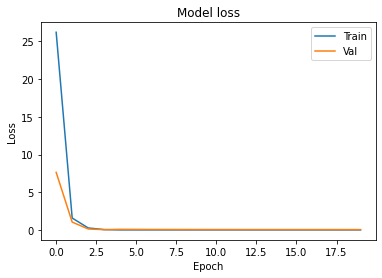

In [25]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()